# Create scatter plot

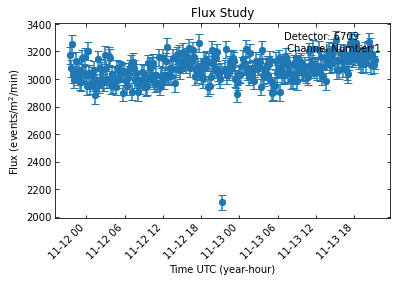

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

#open flux csv file and read in data 
file = open('45_angle_data.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
rows = []
for row in csvreader:
        rows.append(row)

#get flux from file
flux = []
for r in rows:
    flux.append(float(r[2]))

#get dates and times from  file
date_time = []
for d in rows:
    date_time.append(d[0] + ' ' + d[1])
good_times = pd.to_datetime(date_time, format='%y/%m/%d %H:%M:%S')

#get error in flux from file
error = []
for e in rows:
    error.append(float(e[3]))
    
#flux plot  
fig, ax = plt.subplots()
at = AnchoredText("Detector: 6709\n Channel Number:1", prop=dict(size=10), frameon=False, loc='upper right')
ax.add_artist(at)

plt.scatter(good_times, flux)
plt.errorbar(good_times, flux, yerr=error, fmt='o', capsize=4)
plt.title('Flux Study')
plt.xlabel('Time UTC (year-hour)')
plt.ylabel('Flux (events/m$^2$/min)')
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.tick_params(bottom=True, top=True, left=True, right=True, direction='in')

plt.show()
plt.close

file.close()

# Create boxplot

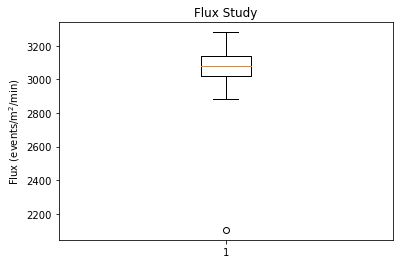

In [2]:
plt.boxplot(flux)

plt.title('Flux Study')
plt.ylabel('Flux (events/m$^2$/min)')

plt.show()
plt.close()

# Run statistical tests

In [3]:
import statistics as stats

print("Mean: ", stats.mean(flux))
print("Median: ", stats.median(flux))
print("Standard deviation: ", stats.stdev(flux))
print("Standard deviation of the mean: ", stats.stdev(flux) / np.sqrt(len(flux)))
print("Variance: ", stats.variance(flux))

err = 1 / np.sqrt(len(flux))
print("Percent statistical error: ", err * 100)

Mean:  3075.1703653426575
Median:  3077.168367
Standard deviation:  100.78288746322745
Standard deviation of the mean:  5.95941706605791
Variance:  10157.190405425568
Percent statistical error:  5.913123959890826
